In [2]:
import pandas as pd
import numpy as np

In [3]:
# import dataset into a pandas data frame

df = pd.read_csv('41467_2022_32829_MOESM5_ESM.csv')
df.head()

,ID,DNA1 [counts],DNA2 [counts],DNA3 [counts],RNA1 [counts],RNA2 [counts],RNA3 [counts],TX1 [au],TX2 [au],TX3 [au],...,high quality,Observed log(TX/Txref),Predicted log(TX/Txref),dG10,dG35,dGDisc,dGITR,dGEXT10,dGSPAC,dGUP
0,0,8263,7261,5173,16341,10320,13506,2.258071,1.523795,1.545541,...,Yes,-3.386326,-3.844827,-1.781524,-1.477218,-0.106428,-0.021112,0.191352,-0.0924,0.400862
1,1,5600,4886,3264,10986,7250,10800,2.240001,1.590845,1.958709,...,Yes,-3.503140,-3.905283,-1.781524,-1.477218,-0.166884,-0.021112,0.191352,-0.0924,0.400862
2,2,7898,6790,4752,19572,32204,30585,2.829533,5.084911,3.810029,...,Yes,-4.207206,-3.905283,-1.781524,-1.477218,-0.166884,-0.021112,0.191352,-0.0924,0.400862
3,3,10651,9875,6466,15734,16246,18908,1.686729,1.763814,1.731036,...,Yes,-3.392439,-3.877808,-1.781524,-1.477218,-0.139409,-0.021112,0.191352,-0.0924,0.400862
4,4,12188,10793,6965,28609,21796,26803,2.680198,2.165100,2.278025,...,Yes,-3.698903,-3.672384,-1.781524,-1.477218,0.066015,-0.021112,0.191352,-0.0924,0.400862


In [4]:
# remove all rows with spacer sequences that are not 16-18 nucleotides long


_df = df[(df['spacs'].str.len() >= 15) & (df['spacs'].str.len() <= 19)]

X = _df[['UP', 'h35', 'spacs', 'h10', 'disc', 'ITR']]
y = _df['Observed log(TX/Txref)']

print(f'Removed {df.shape[0] - _df.shape[0]} rows')


Removed 140 rows


In [5]:
X.head()

,UP,h35,spacs,h10,disc,ITR
0,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CCCCGCGG,CTCTACCTTAGTTTGTACGTT
1,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGGCGG,CTCTACCTTAGTTTGTACGTT
2,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGCCCG,CTCTACCTTAGTTTGTACGTT
3,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,GCGGCGGC,CTCTACCTTAGTTTGTACGTT
4,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGGGGGGC,CTCTACCTTAGTTTGTACGTT


In [5]:
# Function to one-hot encode DNA sequences, including padding 0's

def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = []
    for nucleotide in sequence:
         encoding += [mapping[nucleotide]]
    return encoding

In [6]:
upstream_padding = {}

for col in X.columns:
    max_len = X[col].apply(len).max()
    upstream_padding[col] = np.array([padded_one_hot_encode('0' * (max_len - len(seq)) + seq) for seq in X[col]])

# Concatenate the one-hot encoded, upstream-padded sequences
X = np.concatenate([upstream_padding[col] for col in X.columns], axis=1)

In [8]:
X[0]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0,

In [17]:
from keras.saving import load_model

model = load_model('models/Hyperparameter_tuned.keras')

In [22]:
our_prediction_dict = {}

for i in range(len(X)):
    our_prediction_dict[i] = model.predict(np.array([X[i]]))[0][0]
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

""


In [27]:
our_prediction = pd.DataFrame.from_dict(our_prediction_dict, orient='index', columns=['Value'])

our_prediction.head()

,Value
0,-4.049288
1,-4.041058
2,-4.135314
3,-4.030675
4,-3.941935


In [6]:
observed = _df['Observed log(TX/Txref)']

observed.head()

0   -3.386326
1   -3.503140
2   -4.207206
3   -3.392439
4   -3.698903
Name: Observed log(TX/Txref), dtype: float64

In [29]:
LaFler_predicted = _df['Predicted log(TX/Txref)']

LaFler_predicted.head()

0   -3.844827
1   -3.905283
2   -3.905283
3   -3.877808
4   -3.672384
Name: Predicted log(TX/Txref), dtype: float64

C:\Users\rsore\AppData\Local\Temp\ipykernel_16428\3963406271.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(observed, shade=True)


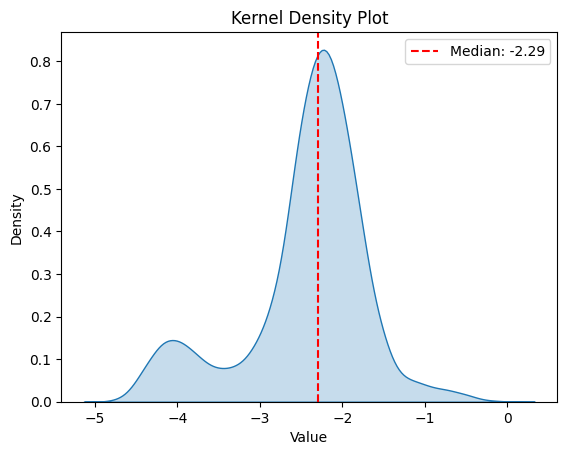

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.kdeplot(observed, shade=True)
plt.title('Kernel Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')

# Calculate the median of the observed data
median_value = np.median(observed)

# Add a dotted line at the median
plt.axvline(median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

# Add a legend to show the median value
plt.legend()

plt.show()


C:\Users\rsore\AppData\Local\Temp\ipykernel_20740\2364124429.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(LaFler_predicted, shade=True)


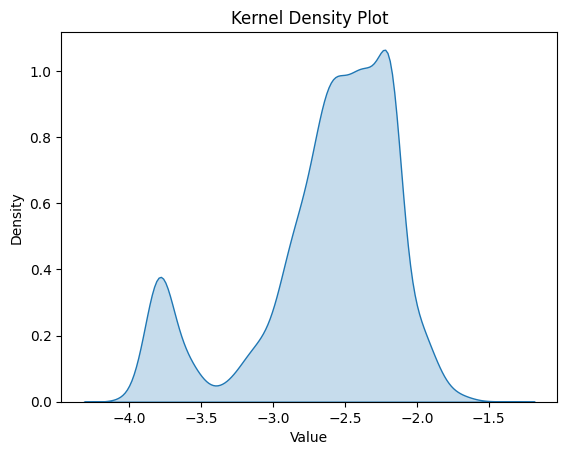

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(LaFler_predicted, shade=True)
plt.title('Kernel Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

C:\Users\rsore\AppData\Local\Temp\ipykernel_20740\3187530168.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(our_prediction, shade=True)


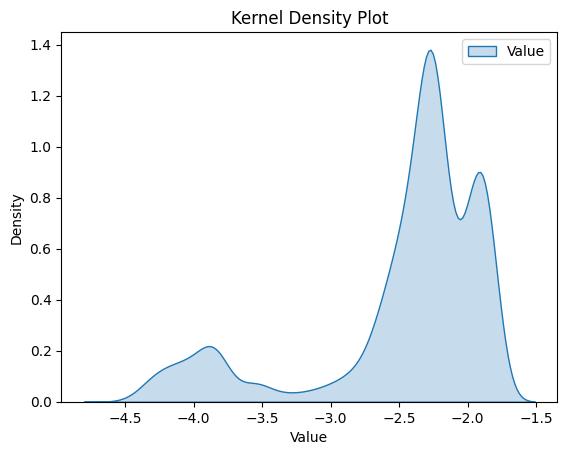

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(our_prediction, shade=True)
plt.title('Kernel Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

C:\Users\rsore\AppData\Local\Temp\ipykernel_20740\1908726426.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(observed, shade=True, color='blue', label='Observed')
C:\Users\rsore\AppData\Local\Temp\ipykernel_20740\1908726426.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(LaFler_predicted, shade=True, color='green', label='LaFler Predicted')
C:\Users\rsore\AppData\Local\Temp\ipykernel_20740\1908726426.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(our_prediction, shade=True, color='red', label='Our Prediction')


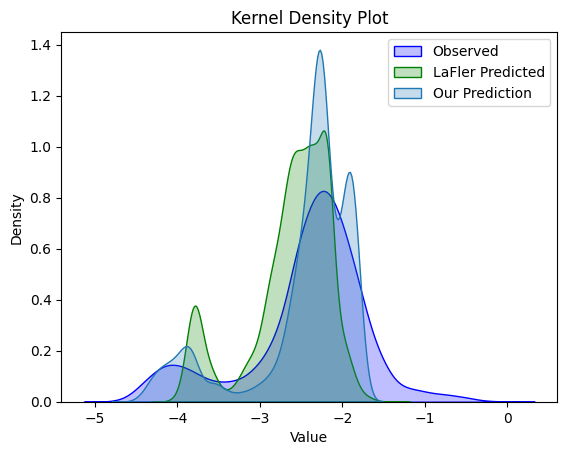

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `observed`, `LaFler_predicted`, and `our_prediction` are defined
sns.kdeplot(observed, shade=True, color='blue', label='Observed')
sns.kdeplot(LaFler_predicted, shade=True, color='green', label='LaFler Predicted')
sns.kdeplot(our_prediction, shade=True, color='red', label='Our Prediction')

plt.title('Kernel Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [64]:
our_prediction.rename(columns={'Value': 'Our Prediction'}, inplace=True)

merged_df = pd.concat([_df, our_prediction], axis=1)
merged_df = merged_df[['UP', 'h35', 'spacs', 'h10', 'disc', 'ITR', 'Observed log(TX/Txref)', 'Predicted log(TX/Txref)', 'Our Prediction']]

merged_df.head()

,UP,h35,spacs,h10,disc,ITR,Observed log(TX/Txref),Predicted log(TX/Txref),Our Prediction
0,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CCCCGCGG,CTCTACCTTAGTTTGTACGTT,-3.386326,-3.844827,-4.049288
1,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGGCGG,CTCTACCTTAGTTTGTACGTT,-3.503140,-3.905283,-4.041058
2,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGCCCG,CTCTACCTTAGTTTGTACGTT,-4.207206,-3.905283,-4.135314
3,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,GCGGCGGC,CTCTACCTTAGTTTGTACGTT,-3.392439,-3.877808,-4.030675
4,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGGGGGGC,CTCTACCTTAGTTTGTACGTT,-3.698903,-3.672384,-3.941935


In [65]:
merged_df.to_csv('predictions.csv', index=False)

In [79]:
predictions = pd.read_csv('predictions.csv')

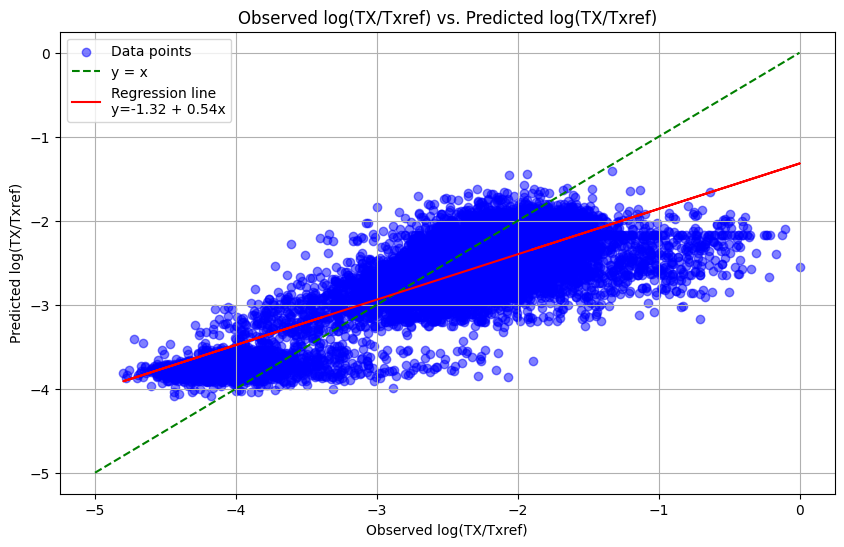

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    np.array(predictions['Observed log(TX/Txref)']), 
    np.array(predictions['Predicted log(TX/Txref)'])
)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions['Observed log(TX/Txref)'], predictions['Predicted log(TX/Txref)'], color='blue', alpha=0.5, label='Data points')
plt.plot([-5, 0], [-5, 0], color='green', linestyle='--', label='y = x')

# Regression line
plt.plot(
    predictions['Observed log(TX/Txref)'],
    intercept + slope * predictions['Observed log(TX/Txref)'],
    color='red',
    label=f'Regression line\ny={intercept:.2f} + {slope:.2f}x'
)

plt.title('Observed log(TX/Txref) vs. Predicted log(TX/Txref)')
plt.xlabel('Observed log(TX/Txref)')
plt.ylabel('Predicted log(TX/Txref)')
plt.legend()
plt.grid(True)
plt.show()


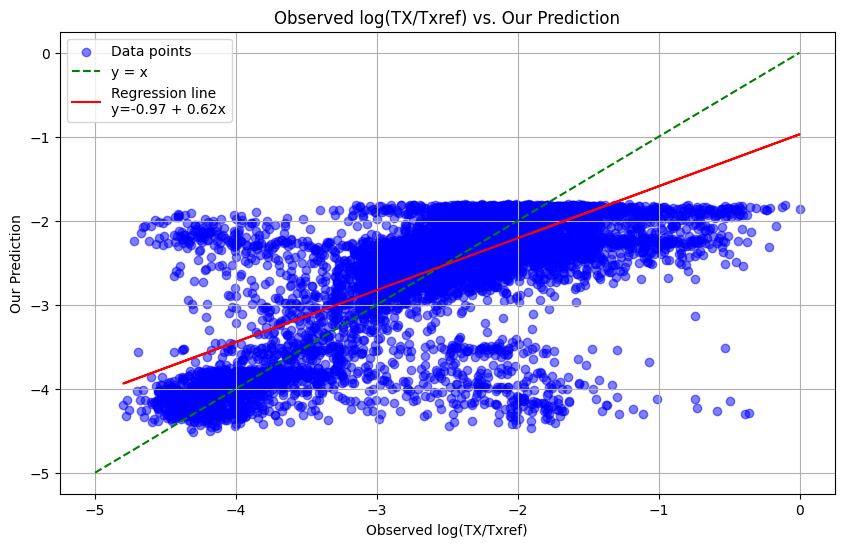

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    np.array(predictions['Observed log(TX/Txref)']), 
    np.array(predictions['Our Prediction'])
)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions['Observed log(TX/Txref)'], predictions['Our Prediction'], color='blue', alpha=0.5, label='Data points')
plt.plot([-5, 0], [-5, 0], color='green', linestyle='--', label='y = x')

# Regression line
plt.plot(
    predictions['Observed log(TX/Txref)'],
    intercept + slope * predictions['Observed log(TX/Txref)'],
    color='red',
    label=f'Regression line\ny={intercept:.2f} + {slope:.2f}x'
)

plt.title('Observed log(TX/Txref) vs. Our Prediction')
plt.xlabel('Observed log(TX/Txref)')
plt.ylabel('Our Prediction')
plt.legend()
plt.grid(True)
plt.show()
